In [43]:
# Load dataset using pandas
import pandas as pd
import numpy as np

df = pd.read_csv("TrainTestData_Promotional Sales.csv")
df = df.drop(['Account'], axis=1)

In [44]:
# Split Test Data and Train Data

test_df = df[df['Trx'] == '????']
train_df = df[df['Trx'] != '????']

In [3]:
train_df.columns

Index([u'Month', u'Trx', u'# Speaker Programs', u'# Calls', u'# PDE',
       u'# Emails', u'# Clicks', u'# Samples'],
      dtype='object')

In [45]:
# train_df.columns = ['Trx', '# Speaker Programs', '# Calls', '# PDE', '# Emails', '# Clicks', '# Samples']
# train_df.index.name = 'Month'
train_df = train_df.set_index('Month')
test_df = test_df.set_index('Month')

train_df.head(5)
#train_df.values

,Trx,# Speaker Programs,# Calls,# PDE,# Emails,# Clicks,# Samples
Month,,,,,,,
1,2991,1,1,9,29,13,12
2,10000,5,8,11,39,25,81
3,7896,3,21,12,40,28,212
4,6987,7,16,12,42,31,193
5,3502,6,1,10,34,18,22


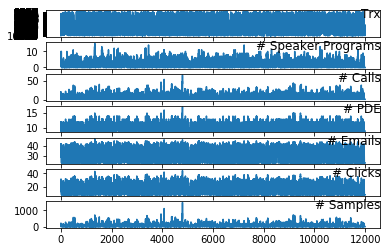

In [14]:
from matplotlib import pyplot
# load dataset
values = train_df.values
# specify columns to plot
groups = [0, 1, 2, 3, 4, 5, 6]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(train_df.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

In [22]:
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame
from pandas import concat

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# load dataset
dataset = train_df
values = dataset.values

# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.294940   0.066667   0.000000      0.000   0.250000   0.138889   
2   1.000000   0.333333   0.111111      0.250   0.666667   0.472222   
3   0.788351   0.200000   0.317460      0.375   0.708333   0.555556   
4   0.696912   0.466667   0.238095      0.375   0.791667   0.638889   
5   0.346343   0.400000   0.000000      0.125   0.458333   0.277778   

   var7(t-1)   var1(t)  
1   0.004084  1.000000  
2   0.051055  0.788351  
3   0.140231  0.696912  
4   0.127297  0.346343  
5   0.010892  0.325018  


In [37]:
values = reframed.values
n_train_months = 8000
train = values[:n_train_months, :]
test = values[n_train_months:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

((8000, 1, 7), (8000,), (3999, 1, 7), (3999,))


Train on 8000 samples, validate on 3999 samples
Epoch 1/50


 - 2s - loss: 0.1643 - val_loss: 0.1638


Epoch 2/50


 - 1s - loss: 0.1448 - val_loss: 0.1548


Epoch 3/50


 - 1s - loss: 0.1372 - val_loss: 0.1519


Epoch 4/50


 - 1s - loss: 0.1351 - val_loss: 0.1513


Epoch 5/50


 - 1s - loss: 0.1345 - val_loss: 0.1518


Epoch 6/50


 - 1s - loss: 0.1347 - val_loss: 0.1521


Epoch 7/50


 - 1s - loss: 0.1347 - val_loss: 0.1521


Epoch 8/50


 - 1s - loss: 0.1347 - val_loss: 0.1521


Epoch 9/50


 - 1s - loss: 0.1346 - val_loss: 0.1515


Epoch 10/50


 - 1s - loss: 0.1344 - val_loss: 0.1520


Epoch 11/50


 - 1s - loss: 0.1345 - val_loss: 0.1509


Epoch 12/50


 - 1s - loss: 0.1343 - val_loss: 0.1510


Epoch 13/50


 - 1s - loss: 0.1342 - val_loss: 0.1513


Epoch 14/50


 - 1s - loss: 0.1343 - val_loss: 0.1516


Epoch 15/50


 - 1s - loss: 0.1343 - val_loss: 0.1511


Epoch 16/50


 - 1s - loss: 0.1340 - val_loss: 0.1516


Epoch 17/50


 - 1s - loss: 0.1342 - val_loss: 0.1512


Epoch 18/50


 - 1s - loss: 0.1341 - val_loss: 0.1513


Epoch 19/50


 - 1s - loss: 0.1341 - val_loss: 0.1513


Epoch 20/50


 - 1s - loss: 0.1340 - val_loss: 0.1513


Epoch 21/50


 - 1s - loss: 0.1340 - val_loss: 0.1508


Epoch 22/50


 - 1s - loss: 0.1339 - val_loss: 0.1509


Epoch 23/50


 - 1s - loss: 0.1338 - val_loss: 0.1510


Epoch 24/50


 - 1s - loss: 0.1339 - val_loss: 0.1514


Epoch 25/50


 - 1s - loss: 0.1339 - val_loss: 0.1507


Epoch 26/50


 - 1s - loss: 0.1337 - val_loss: 0.1509


Epoch 27/50


 - 1s - loss: 0.1338 - val_loss: 0.1507


Epoch 28/50


 - 1s - loss: 0.1337 - val_loss: 0.1509


Epoch 29/50


 - 1s - loss: 0.1338 - val_loss: 0.1506


Epoch 30/50


 - 1s - loss: 0.1336 - val_loss: 0.1505


Epoch 31/50


 - 1s - loss: 0.1336 - val_loss: 0.1504


Epoch 32/50


 - 1s - loss: 0.1336 - val_loss: 0.1504


Epoch 33/50


 - 1s - loss: 0.1336 - val_loss: 0.1513


Epoch 34/50


 - 1s - loss: 0.1337 - val_loss: 0.1506


Epoch 35/50


 - 1s - loss: 0.1336 - val_loss: 0.1503


Epoch 36/50


 - 1s - loss: 0.1335 - val_loss: 0.1501


Epoch 37/50


 - 1s - loss: 0.1334 - val_loss: 0.1505


Epoch 38/50


 - 1s - loss: 0.1334 - val_loss: 0.1502


Epoch 39/50


 - 1s - loss: 0.1334 - val_loss: 0.1504


Epoch 40/50


 - 1s - loss: 0.1334 - val_loss: 0.1502


Epoch 41/50


 - 1s - loss: 0.1334 - val_loss: 0.1500


Epoch 42/50


 - 1s - loss: 0.1333 - val_loss: 0.1508


Epoch 43/50


 - 1s - loss: 0.1334 - val_loss: 0.1505


Epoch 44/50


 - 1s - loss: 0.1334 - val_loss: 0.1498


Epoch 45/50


 - 1s - loss: 0.1332 - val_loss: 0.1502


Epoch 46/50


 - 1s - loss: 0.1333 - val_loss: 0.1506


Epoch 47/50


 - 1s - loss: 0.1334 - val_loss: 0.1505


Epoch 48/50


 - 1s - loss: 0.1334 - val_loss: 0.1505


Epoch 49/50


 - 1s - loss: 0.1333 - val_loss: 0.1505


Epoch 50/50


 - 1s - loss: 0.1332 - val_loss: 0.1493


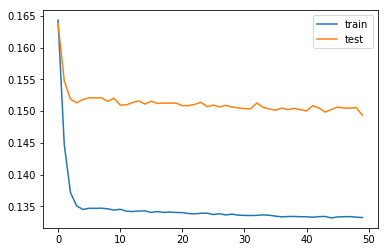

In [38]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [39]:
test_X.shape

(3999, 1, 7)

In [40]:
from numpy import concatenate
from math import sqrt
from sklearn.metrics import mean_squared_error

yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 2484.846


In [48]:
inv_yhat

array([ 858.61456, 5891.789  , 5454.4756 , ...,  656.6888 ,  656.6888 ,
        656.6888 ], dtype=float32)

In [50]:
test_df.columns

Index([u'Trx', u'# Speaker Programs', u'# Calls', u'# PDE', u'# Emails',
       u'# Clicks', u'# Samples'],
      dtype='object')

In [62]:
test_df['Trx'] = test_df['Trx'].apply(lambda x: 0 if x == '????' else x)
test_df['Trx'] = test_df['Trx'].astype(int)

In [97]:
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame
from pandas import concat

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# load dataset
dataset = test_df
values = dataset.values

# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1        0.0   0.416667   0.000000   0.142857   0.434783   0.264706   
2        0.0   0.416667   0.125000   0.285714   0.695652   0.500000   
3        0.0   0.583333   0.125000   0.285714   0.739130   0.558824   
4        0.0   0.416667   0.196429   0.428571   0.739130   0.588235   
5        0.0   0.250000   0.000000   0.142857   0.391304   0.235294   

   var7(t-1)  var1(t)  
1   0.011676      0.0  
2   0.062552      0.0  
3   0.069224      0.0  
4   0.105088      0.0  
5   0.010842      0.0  


In [98]:
test_data = reframed.values
test_data = test_data[:, :-1]
test_data = test_data.reshape(test_data.shape[0], 1, test_data.shape[1])

In [99]:
predictions = model.predict(test_data)
predictions
# test_data = test_data.reshape((test_data.shape[0], test_data.shape[2]))
# # invert scaling for forecast
# inv_pred = concatenate((yhat, test_data[:, 1:]), axis=1)
# inv_pred = scaler.inverse_transform(inv_pred)
# # inv_yhat = inv_pred[:,0]
# inv_pred

array([[0.02358476],
       [0.02450312],
       [0.02833598],
       ...,
       [0.04899547],
       [0.04072064],
       [0.05848945]], dtype=float32)

In [100]:
test_data = test_data.reshape((test_data.shape[0], test_data.shape[2]))
inv_pred = concatenate((predictions, test_data[:, 1:]), axis=1)

In [101]:
inv_pred = scaler.inverse_transform(inv_pred)

In [104]:
inv_pred

array([[2.3584761e-02, 5.0000000e+00, 1.0000000e+00, ..., 3.3000000e+01,
        1.7000000e+01, 2.0000000e+01],
       [2.4503116e-02, 5.0000000e+00, 8.0000000e+00, ..., 3.9000000e+01,
        2.5000000e+01, 8.1000000e+01],
       [2.8335981e-02, 7.0000005e+00, 8.0000000e+00, ..., 4.0000000e+01,
        2.7000000e+01, 8.9000000e+01],
       ...,
       [4.8995472e-02, 0.0000000e+00, 2.5000000e+01, ..., 2.3000000e+01,
        9.0000000e+00, 4.7000000e+01],
       [4.0720638e-02, 0.0000000e+00, 1.8000000e+01, ..., 2.3000000e+01,
        9.0000000e+00, 3.4000004e+01],
       [5.8489449e-02, 3.0000000e+00, 3.0000002e+01, ..., 4.2000000e+01,
        3.2000000e+01, 3.7900000e+02]], dtype=float32)

In [102]:
inv_pred_mod = inv_pred[:, 0]

In [103]:
inv_pred_mod

array([0.02358476, 0.02450312, 0.02833598, ..., 0.04899547, 0.04072064,
       0.05848945], dtype=float32)

In [106]:
np.savetxt("output.csv", np.asarray(inv_pred_mod), delimiter=",")

In [94]:
def chunks(l, n):
    for i in range(0, len(l), n):
        # Create an index range for l of n items:
        yield l[i:i+n]
    
pred_array = list(chunks(inv_pred_mod, 6))

In [96]:
np.savetxt("output.csv", np.asarray(pred_array), delimiter=",", header='A,B,C,D,E,F')

TypeError: Mismatch between array dtype ('object') and format specifier ('%.18e')